In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [5]:
df.drop(['ID','Experience','ZIP Code','Family'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   CCAvg               5000 non-null   float64
 3   Education           5000 non-null   int64  
 4   Mortgage            5000 non-null   int64  
 5   Personal Loan       5000 non-null   int64  
 6   Securities Account  5000 non-null   int64  
 7   CD Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 390.8 KB


In [7]:
df.isnull().sum()

Age                   0
Income                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

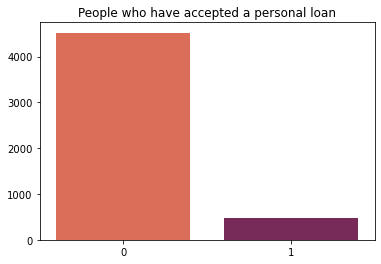

In [8]:
sns.barplot(x=df['Personal Loan'].value_counts().index, y=df['Personal Loan'].value_counts().values,
           palette='rocket_r',)
plt.title('People who have accepted a personal loan')
plt.show()

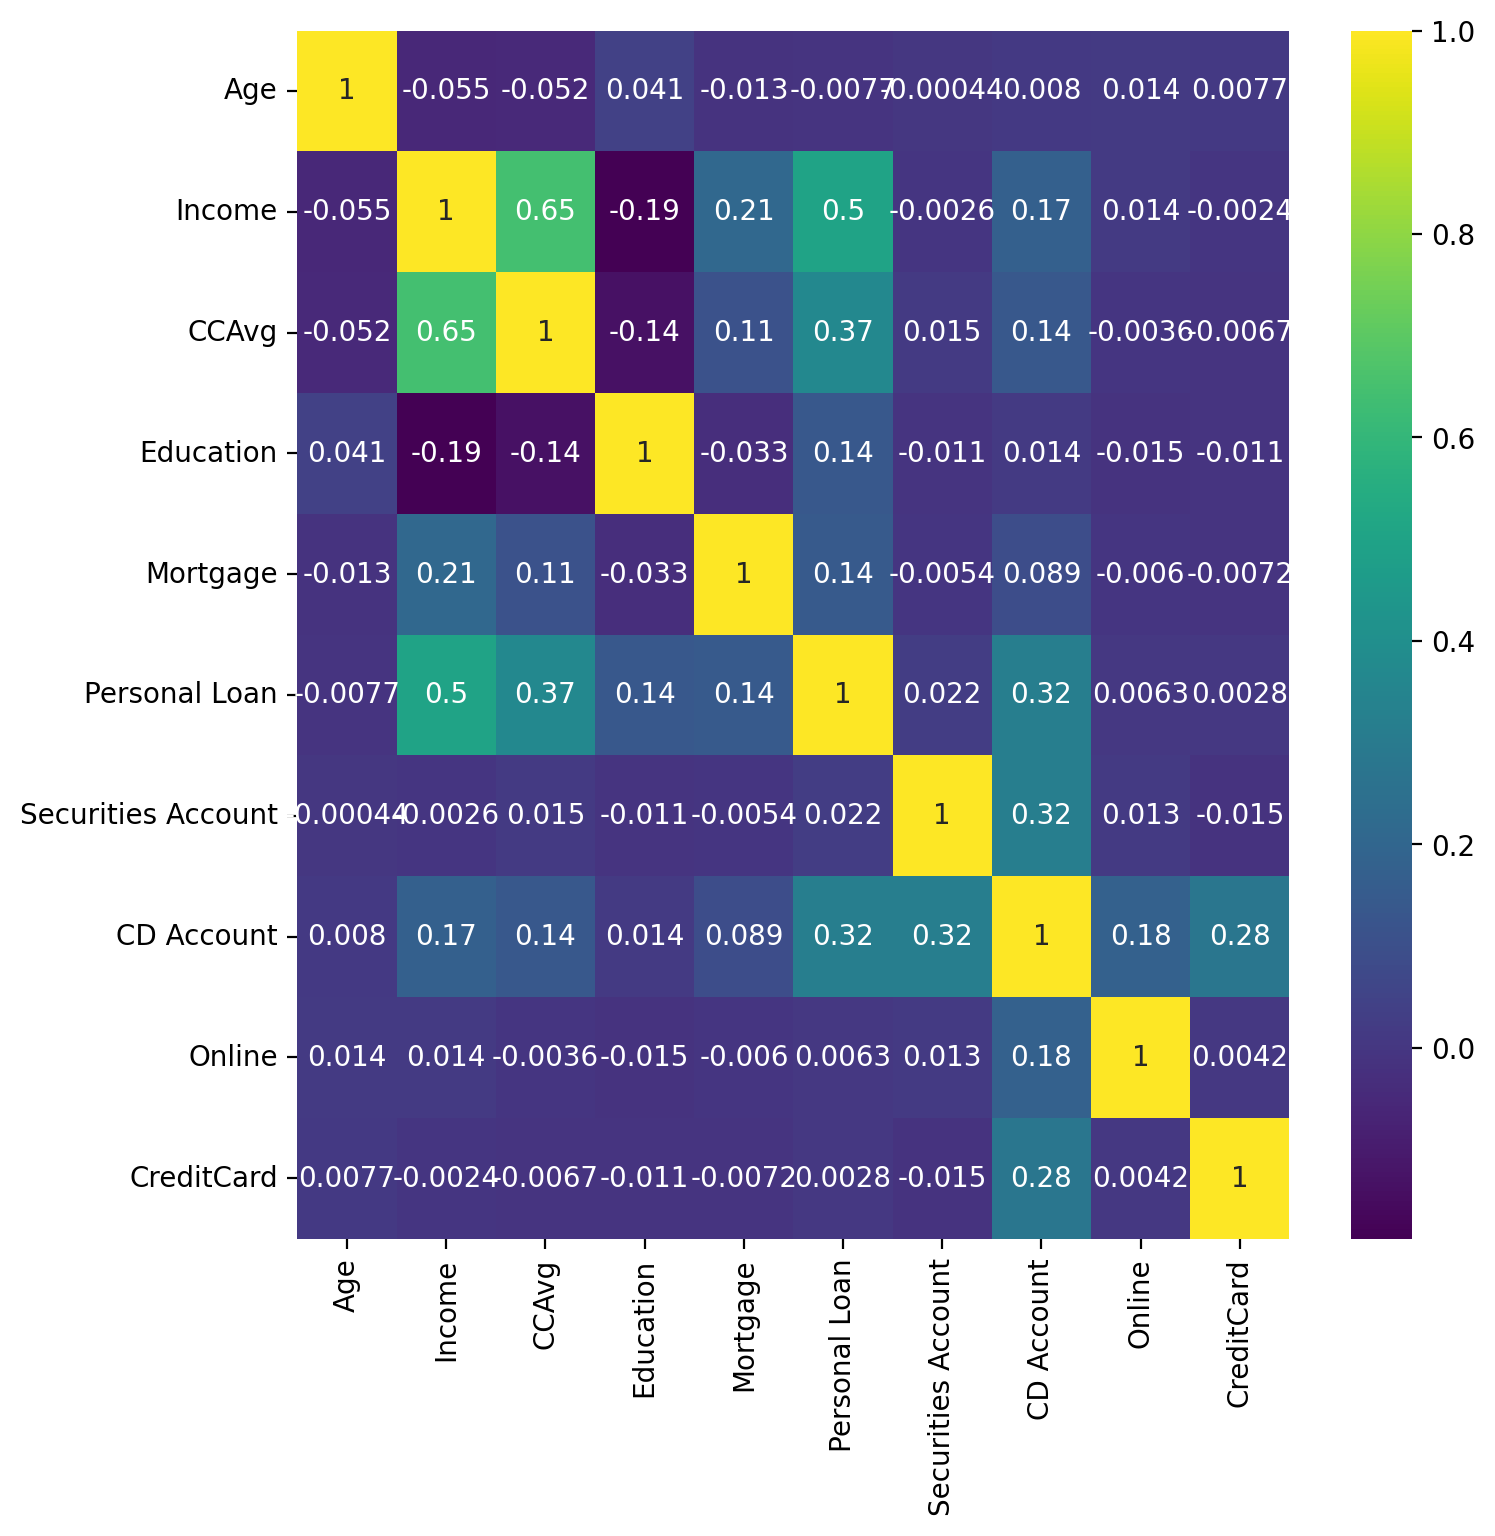

In [9]:
plt.figure(figsize = (8,8),dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

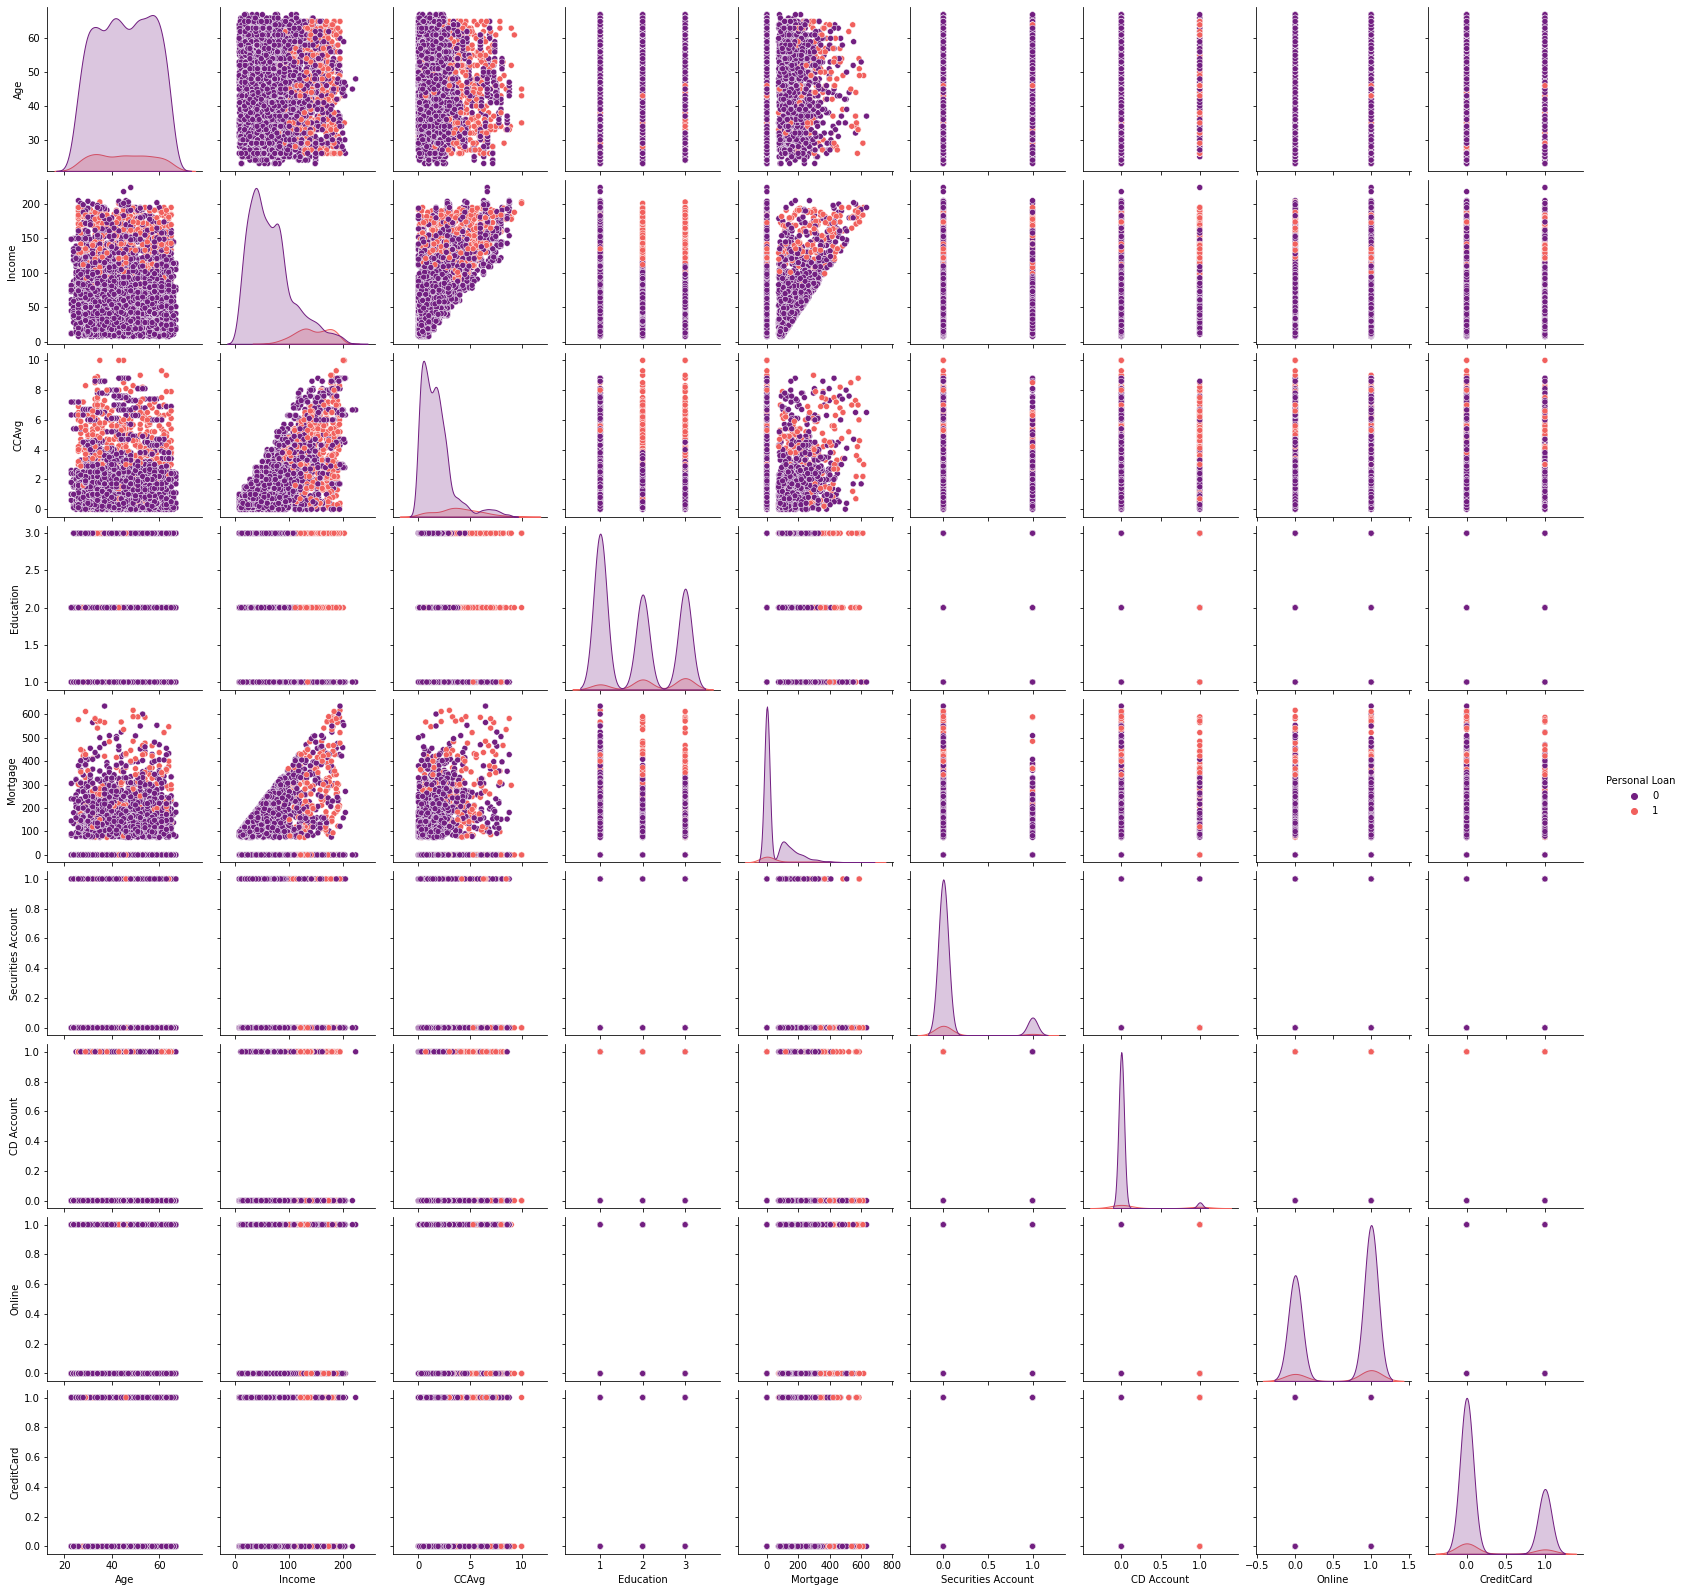

In [10]:
sns.pairplot(df, palette='magma', hue='Personal Loan')
plt.show()

In [11]:
df.head()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,1.6,1,0,0,1,0,0,0
1,45,34,1.5,1,0,0,1,0,0,0
2,39,11,1.0,1,0,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,0,1


In [12]:
x=df.drop('Personal Loan',axis=1).values
x

array([[25. , 49. ,  1.6, ...,  0. ,  0. ,  0. ],
       [45. , 34. ,  1.5, ...,  0. ,  0. ,  0. ],
       [39. , 11. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [63. , 24. ,  0.3, ...,  0. ,  0. ,  0. ],
       [65. , 49. ,  0.5, ...,  0. ,  1. ,  0. ],
       [28. , 83. ,  0.8, ...,  0. ,  1. ,  1. ]])

In [13]:
y=df['Personal Loan'].values.reshape((-1,1))

In [14]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [17]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [18]:
df.drop('Personal Loan', axis = 1)

,Age,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,1.6,1,0,1,0,0,0
1,45,34,1.5,1,0,1,0,0,0
2,39,11,1.0,1,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,29,40,1.9,3,0,0,0,1,0
4996,30,15,0.4,1,85,0,0,1,0
4997,63,24,0.3,3,0,0,0,0,0
4998,65,49,0.5,2,0,0,0,1,0


In [19]:
df.describe()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [20]:
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print(classification_report(y_test,ypred))
    return model

In [21]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [22]:
pipe=Pipeline(steps=[('scaling',StandardScaler()),('svm',SVC())])

# 1.---> LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [24]:
ac=accuracy_score(y_test,ypred)
cr=classification_report(y_test,ypred)
print(ac)
print(cr)

0.9413333333333334
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1351
           1       0.80      0.55      0.65       149

    accuracy                           0.94      1500
   macro avg       0.87      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [25]:
logreg=LogisticRegression(solver="liblinear")
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [26]:
ac=accuracy_score(y_test,ypred)
cr=classification_report(y_test,ypred)
print(ac)
print(cr)

0.944
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.53      0.65       149

    accuracy                           0.94      1500
   macro avg       0.90      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [27]:
logreg=LogisticRegression(solver='liblinear')
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.53      0.65       149

    accuracy                           0.94      1500
   macro avg       0.90      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



LogisticRegression(solver='liblinear')

In [28]:
logreg=LogisticRegression(solver='newton-cg')
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.56      0.68       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



LogisticRegression(solver='newton-cg')

In [29]:
logreg=LogisticRegression(solver='lbfgs')
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1351
           1       0.80      0.55      0.65       149

    accuracy                           0.94      1500
   macro avg       0.87      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



LogisticRegression()

In [30]:
logreg=LogisticRegression(solver='saga')
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1351
           1       0.38      0.15      0.22       149

    accuracy                           0.89      1500
   macro avg       0.64      0.56      0.58      1500
weighted avg       0.86      0.89      0.87      1500



LogisticRegression(solver='saga')

### After Standard Scaling.

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(x_train)
xtest=sc.transform(x_test)

In [32]:
logreg=LogisticRegression(solver="saga")
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [33]:
ac=accuracy_score(y_test,ypred)
cr=classification_report(y_test,ypred)
print(ac)
print(cr)

0.8906666666666667
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1351
           1       0.38      0.15      0.22       149

    accuracy                           0.89      1500
   macro avg       0.64      0.56      0.58      1500
weighted avg       0.86      0.89      0.87      1500



In [34]:
logreg=LogisticRegression(solver="sag")
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [35]:
ac=accuracy_score(y_test,ypred)
cr=classification_report(y_test,ypred)
print(ac)
print(cr)

0.8913333333333333
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1351
           1       0.39      0.16      0.23       149

    accuracy                           0.89      1500
   macro avg       0.65      0.57      0.58      1500
weighted avg       0.86      0.89      0.87      1500



# 2.---> SVM (Support Vector Machine)

In [36]:
svm=SVC()
mymodel(svm)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.71      0.11      0.20       149

    accuracy                           0.91      1500
   macro avg       0.81      0.55      0.57      1500
weighted avg       0.89      0.91      0.88      1500



SVC()

In [37]:
svm=SVC(kernel='linear')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.88      0.57      0.69       149

    accuracy                           0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500



SVC(kernel='linear')

In [38]:
svm=SVC(kernel='poly')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1351
           1       0.93      0.09      0.17       149

    accuracy                           0.91      1500
   macro avg       0.92      0.55      0.56      1500
weighted avg       0.91      0.91      0.87      1500



SVC(kernel='poly')

In [39]:
svm=SVC(kernel='sigmoid')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1351
           1       0.35      0.30      0.32       149

    accuracy                           0.87      1500
   macro avg       0.64      0.62      0.63      1500
weighted avg       0.87      0.87      0.87      1500



SVC(kernel='sigmoid')

# 3.---> KNN (K Nearest Neighbors)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [41]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1351
           1       0.50      0.34      0.40       149

    accuracy                           0.90      1500
   macro avg       0.71      0.65      0.67      1500
weighted avg       0.89      0.90      0.89      1500



KNeighborsClassifier()

# 4.---> Decision Tree (DT)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [43]:
dt=DecisionTreeClassifier()

In [44]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1351
           1       0.74      0.79      0.76       149

    accuracy                           0.95      1500
   macro avg       0.86      0.88      0.87      1500
weighted avg       0.95      0.95      0.95      1500



DecisionTreeClassifier()

In [46]:
x=df.drop('Personal Loan',axis=1)

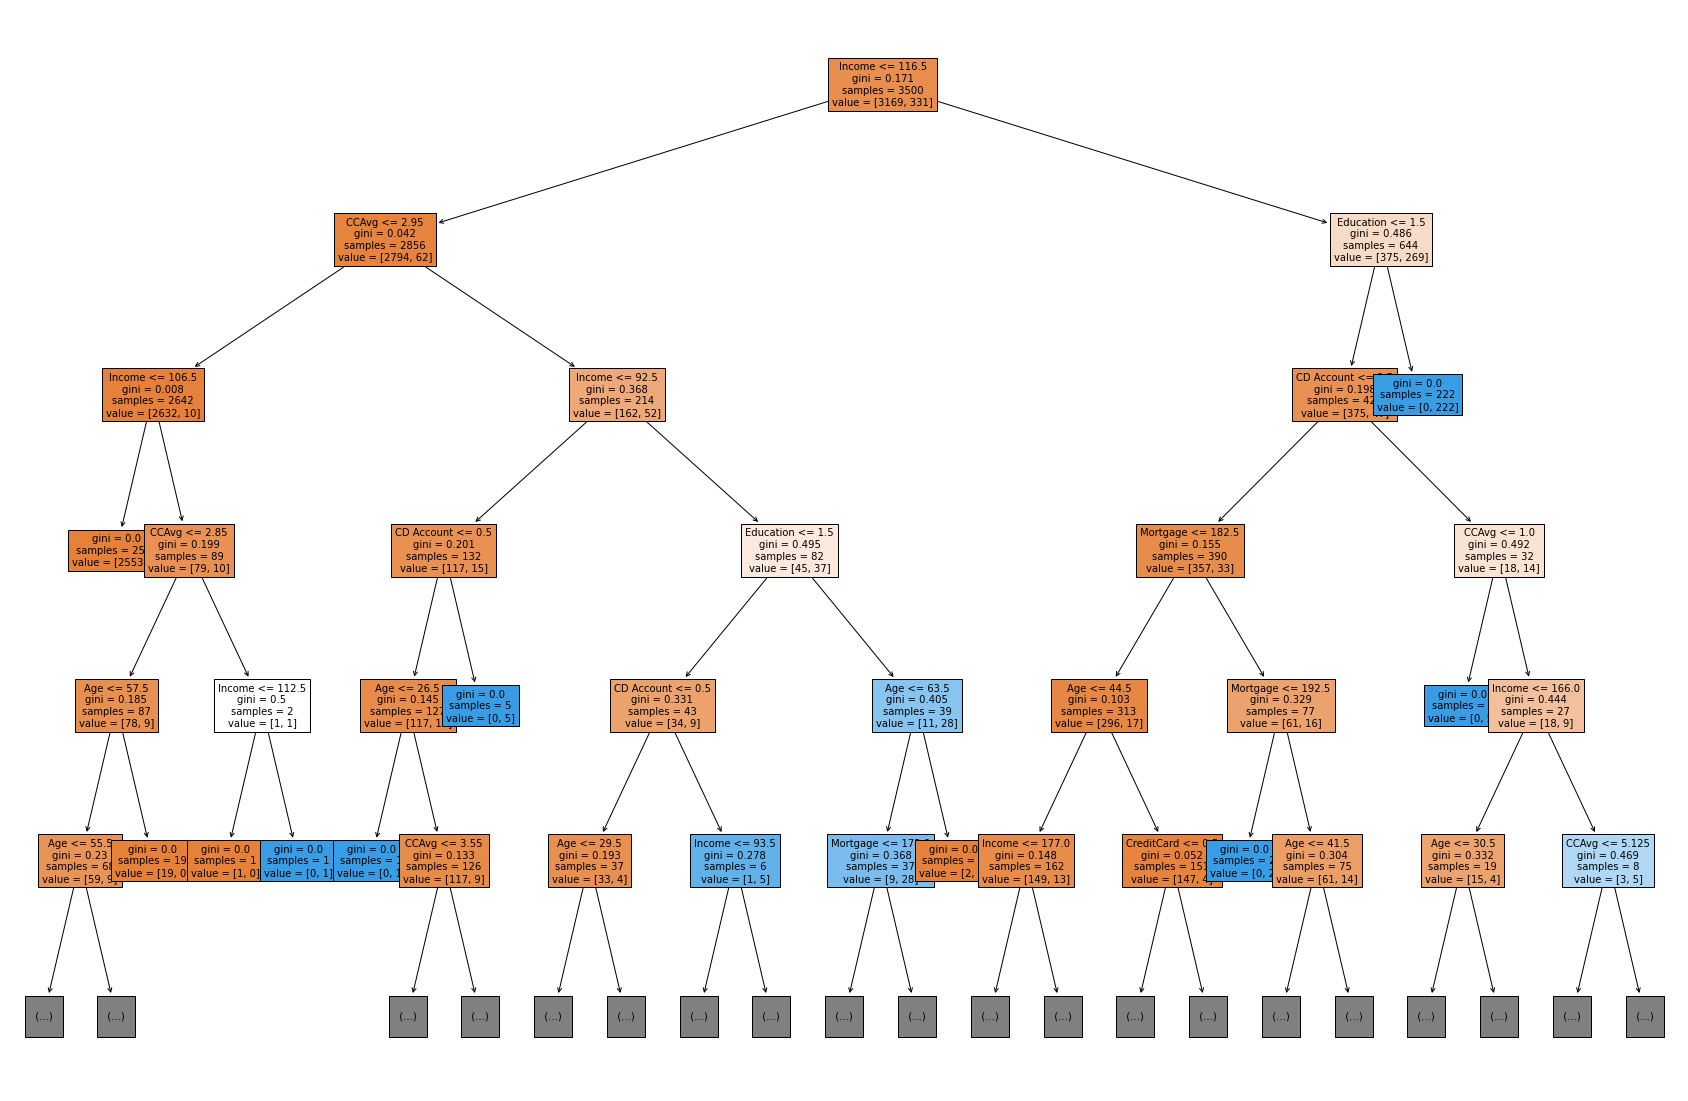

In [73]:
fig,ax=plt.subplots(figsize=(30,20))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig('abc.jpg')

In [48]:
train=dt.score(x_train,y_train)
test=dt.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :1.0 
test score: 0.9506666666666667


### Hypertunning the DT model

### *max_depth

In [50]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    ypred=dt1.predict(x_test)
    ac=accuracy_score(y_test,ypred)
    print(f"max_depth:{i} Accuracy: {ac}")

max_depth:1 Accuracy: 0.9006666666666666
max_depth:2 Accuracy: 0.962
max_depth:3 Accuracy: 0.962
max_depth:4 Accuracy: 0.9666666666666667
max_depth:5 Accuracy: 0.9666666666666667
max_depth:6 Accuracy: 0.9626666666666667
max_depth:7 Accuracy: 0.9593333333333334
max_depth:8 Accuracy: 0.9566666666666667
max_depth:9 Accuracy: 0.956
max_depth:10 Accuracy: 0.95
max_depth:11 Accuracy: 0.9506666666666667
max_depth:12 Accuracy: 0.9526666666666667
max_depth:13 Accuracy: 0.948
max_depth:14 Accuracy: 0.9506666666666667
max_depth:15 Accuracy: 0.9546666666666667
max_depth:16 Accuracy: 0.952
max_depth:17 Accuracy: 0.9526666666666667
max_depth:18 Accuracy: 0.9533333333333334
max_depth:19 Accuracy: 0.9533333333333334
max_depth:20 Accuracy: 0.9513333333333334
max_depth:21 Accuracy: 0.952
max_depth:22 Accuracy: 0.952
max_depth:23 Accuracy: 0.954
max_depth:24 Accuracy: 0.9513333333333334
max_depth:25 Accuracy: 0.9513333333333334
max_depth:26 Accuracy: 0.9513333333333334
max_depth:27 Accuracy: 0.9513333333

In [52]:
dt2=DecisionTreeClassifier(max_depth=11)
mymodel(dt2)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1351
           1       0.74      0.79      0.76       149

    accuracy                           0.95      1500
   macro avg       0.86      0.88      0.87      1500
weighted avg       0.95      0.95      0.95      1500



DecisionTreeClassifier(max_depth=11)

In [53]:
train=dt2.score(x_train,y_train)
test=dt2.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :0.996 
test score: 0.9506666666666667


### *min_samples_split

In [62]:
for i in range(10,200):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(x_train,y_train)
    ypred=dt3.predict(x_test)
    ac=accuracy_score(y_test,ypred)
    print(f'min_samples_split: {i} Accuracy: {ac}')

min_samples_split: 10 Accuracy: 0.9553333333333334
min_samples_split: 11 Accuracy: 0.954
min_samples_split: 12 Accuracy: 0.954
min_samples_split: 13 Accuracy: 0.9546666666666667
min_samples_split: 14 Accuracy: 0.9566666666666667
min_samples_split: 15 Accuracy: 0.9553333333333334
min_samples_split: 16 Accuracy: 0.9566666666666667
min_samples_split: 17 Accuracy: 0.956
min_samples_split: 18 Accuracy: 0.9566666666666667
min_samples_split: 19 Accuracy: 0.956
min_samples_split: 20 Accuracy: 0.956
min_samples_split: 21 Accuracy: 0.956
min_samples_split: 22 Accuracy: 0.956
min_samples_split: 23 Accuracy: 0.9586666666666667
min_samples_split: 24 Accuracy: 0.9586666666666667
min_samples_split: 25 Accuracy: 0.958
min_samples_split: 26 Accuracy: 0.958
min_samples_split: 27 Accuracy: 0.9586666666666667
min_samples_split: 28 Accuracy: 0.9586666666666667
min_samples_split: 29 Accuracy: 0.9593333333333334
min_samples_split: 30 Accuracy: 0.9593333333333334
min_samples_split: 31 Accuracy: 0.959333333333

In [63]:
dt4=DecisionTreeClassifier(min_samples_split=82)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.93      0.74      0.82       149

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500



DecisionTreeClassifier(min_samples_split=82)

In [64]:
train=dt4.score(x_train,y_train)
test=dt4.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :0.9754285714285714 
test score: 0.9686666666666667


### *min_samples_leaf

In [69]:
for i in range(2,150):
    dt5=DecisionTreeClassifier(min_samples_split=i)
    dt5.fit(x_train,y_train)
    ypred=dt5.predict(x_test)
    ac=accuracy_score(y_test,ypred)
    print(f'min_samples_split: {i} Accuracy: {ac}')

min_samples_split: 2 Accuracy: 0.9513333333333334
min_samples_split: 3 Accuracy: 0.9513333333333334
min_samples_split: 4 Accuracy: 0.9526666666666667
min_samples_split: 5 Accuracy: 0.9506666666666667
min_samples_split: 6 Accuracy: 0.9506666666666667
min_samples_split: 7 Accuracy: 0.9553333333333334
min_samples_split: 8 Accuracy: 0.954
min_samples_split: 9 Accuracy: 0.9566666666666667
min_samples_split: 10 Accuracy: 0.9553333333333334
min_samples_split: 11 Accuracy: 0.9546666666666667
min_samples_split: 12 Accuracy: 0.954
min_samples_split: 13 Accuracy: 0.9553333333333334
min_samples_split: 14 Accuracy: 0.956
min_samples_split: 15 Accuracy: 0.954
min_samples_split: 16 Accuracy: 0.956
min_samples_split: 17 Accuracy: 0.9566666666666667
min_samples_split: 18 Accuracy: 0.956
min_samples_split: 19 Accuracy: 0.9566666666666667
min_samples_split: 20 Accuracy: 0.9566666666666667
min_samples_split: 21 Accuracy: 0.9566666666666667
min_samples_split: 22 Accuracy: 0.9566666666666667
min_samples_spl

In [70]:
dt6=DecisionTreeClassifier(min_samples_split=82)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.93      0.74      0.82       149

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500



DecisionTreeClassifier(min_samples_split=82)

In [71]:
train=dt6.score(x_train,y_train)
test=dt6.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :0.9754285714285714 
test score: 0.9686666666666667


# 5.---> Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.55      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [76]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.86      0.72      0.79       149

    accuracy                           0.96      1500
   macro avg       0.92      0.86      0.88      1500
weighted avg       0.96      0.96      0.96      1500



# 6.---> RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
ypred=rc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.93      0.75      0.83       149

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



# 7.---> VotingClassifier

In [78]:
models=[]
accuracy=[]
models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))

In [79]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=models)
vc.fit(x_train,y_train)
ypred=vc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.95      0.49      0.65       149

    accuracy                           0.95      1500
   macro avg       0.95      0.74      0.81      1500
weighted avg       0.95      0.95      0.94      1500



# 8.---> Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
ypred=gbc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.93      0.74      0.83       149

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



# 9.---> xgboost

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [82]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
ypred=xgb.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.89      0.78      0.83       149

    accuracy                           0.97      1500
   macro avg       0.93      0.88      0.91      1500
weighted avg       0.97      0.97      0.97      1500

